Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats

In [ ]:
# importing csvs

In [71]:
bikes_df = pd.read_csv('../data/finalCSVs/city_bikes.csv')
bikes_df['ll'] = bikes_df['latitude'] + bikes_df['longitude']
bikes_df.head()

,latitude,longitude,total_bikes,id,ll
0,41.765862,-87.614787,2,0503ab6ec0734343264ef6f2e972c32b,-45.848925
1,41.870959,-87.700259,8,3b5764e0f031bd56d4b7985250805270,-45.829300
2,41.666395,-87.619933,1,4067cf8e05861b94b7f003d1c2955f07,-45.953538
3,41.775144,-87.708129,15,a08a288f5a66216ca4bc4091dd34f94c,-45.932985
4,41.942423,-87.747130,1,b7013ce71928ecee4dec9478a2d4fce6,-45.804707


In [72]:
bikes_df.shape[0]

567

In [ ]:
# combining yelp & foursquare data first

In [73]:
fsq_df = pd.read_csv('../data/finalCSVs/fsq_df_final.csv')
fsq_df.head()

,name,popularity,price,rating,distance,latitude,longitude,ll,poi_cat
0,Inn,9.67,2.0,NaN,36.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
1,Roy's Soul Food,8.93,1.0,NaN,45.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
2,Sammy Submarine,NaN,NaN,NaN,69.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
3,Sunny Submarine,9.97,1.0,NaN,70.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
4,Gold Post Lounge,NaN,NaN,NaN,180.0,41.765862,-87.614787,41.765862%2C-87.614787,restaurant


In [74]:
# checking number of rows for foursquare data
fsq_df.shape[0] 

11907

In [75]:
yelp_df = pd.read_csv('../data/finalCSVs/yelp_df_final.csv')
yelp_df.head()

,name,rating,price,distance,latitude,longitude,ll,poi_cat
0,Roy's Soul Food,70.0,1,45.728666,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
1,Sunny Sub,70.0,1,57.372699,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
2,Uncle Don Ray's,30.0,1,417.066004,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
3,Southtown Sub,80.0,1,513.689635,41.765862,-87.614787,41.765862%2C-87.614787,restaurant
4,Baba's Famous Steak & Lemonade,50.0,1,607.730035,41.765862,-87.614787,41.765862%2C-87.614787,restaurant


In [76]:
# checking number of rows for yelp data
yelp_df.shape[0]

6613

In [77]:
# merging foursquare & yelp dataframes
food_df = pd.concat([fsq_df, yelp_df])

In [78]:
# shape should be 18,520 11,907 + 6,613
food_df.shape[0]

18520

In [79]:
food_df['ll'] = food_df['latitude'] + food_df['longitude']

In [80]:
food_df = food_df[['name','popularity','price','rating','distance','poi_cat','latitude','longitude','ll']]

In [81]:
food_df

,name,popularity,price,rating,distance,poi_cat,latitude,longitude,ll
0,Inn,9.67,2.0,NaN,36.000000,restaurant,41.765862,-87.614787,-45.848925
1,Roy's Soul Food,8.93,1.0,NaN,45.000000,restaurant,41.765862,-87.614787,-45.848925
2,Sammy Submarine,NaN,NaN,NaN,69.000000,restaurant,41.765862,-87.614787,-45.848925
3,Sunny Submarine,9.97,1.0,NaN,70.000000,restaurant,41.765862,-87.614787,-45.848925
4,Gold Post Lounge,NaN,NaN,NaN,180.000000,restaurant,41.765862,-87.614787,-45.848925
...,...,...,...,...,...,...,...,...,...
6608,Barbara's Bestsellers,NaN,2.0,70.0,707.843830,books,41.889375,-87.627077,-45.737701
6609,Kurt Gippert Bookseller ABAA,NaN,2.0,100.0,709.178438,books,41.939398,-87.711561,-45.772163
6610,Sandmeyer's Bookstore,NaN,2.0,80.0,972.590369,books,41.871467,-87.640949,-45.769483
6611,Curbside Books & Records,NaN,2.0,60.0,1278.560000,books,41.871467,-87.640949,-45.769483


In [60]:
food_df.set_index('ll')

,name,popularity,price,rating,distance,poi_cat,latitude,longitude
ll,,,,,,,,
-45.848925,Inn,9.67,2.0,NaN,36.000000,restaurant,41.765862,-87.614787
-45.848925,Roy's Soul Food,8.93,1.0,NaN,45.000000,restaurant,41.765862,-87.614787
-45.848925,Sammy Submarine,NaN,NaN,NaN,69.000000,restaurant,41.765862,-87.614787
-45.848925,Sunny Submarine,9.97,1.0,NaN,70.000000,restaurant,41.765862,-87.614787
-45.848925,Gold Post Lounge,NaN,NaN,NaN,180.000000,restaurant,41.765862,-87.614787
...,...,...,...,...,...,...,...,...
-45.737701,Barbara's Bestsellers,NaN,2.0,70.0,707.843830,books,41.889375,-87.627077
-45.772163,Kurt Gippert Bookseller ABAA,NaN,2.0,100.0,709.178438,books,41.939398,-87.711561
-45.769483,Sandmeyer's Bookstore,NaN,2.0,80.0,972.590369,books,41.871467,-87.640949


In [51]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18520 entries, 0 to 6612
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        18520 non-null  object 
 1   popularity  9113 non-null   float64
 2   price       11714 non-null  float64
 3   rating      10790 non-null  float64
 4   distance    18520 non-null  float64
 5   latitude    18520 non-null  float64
 6   longitude   18520 non-null  float64
 7   ll          18520 non-null  float64
 8   poi_cat     18520 non-null  object 
dtypes: float64(7), object(2)
memory usage: 1.9+ MB


In [82]:
# joining food dataframe with bike data
final_df = food_df.merge(bikes_df, how='left', on='ll')

In [83]:
# making sure dataframes merged in the correct spot
final_df

,name,popularity,price,rating,distance,poi_cat,latitude_x,longitude_x,ll,latitude_y,longitude_y,total_bikes,id
0,Inn,9.67,2.0,NaN,36.000000,restaurant,41.765862,-87.614787,-45.848925,41.765862,-87.614787,2,0503ab6ec0734343264ef6f2e972c32b
1,Roy's Soul Food,8.93,1.0,NaN,45.000000,restaurant,41.765862,-87.614787,-45.848925,41.765862,-87.614787,2,0503ab6ec0734343264ef6f2e972c32b
2,Sammy Submarine,NaN,NaN,NaN,69.000000,restaurant,41.765862,-87.614787,-45.848925,41.765862,-87.614787,2,0503ab6ec0734343264ef6f2e972c32b
3,Sunny Submarine,9.97,1.0,NaN,70.000000,restaurant,41.765862,-87.614787,-45.848925,41.765862,-87.614787,2,0503ab6ec0734343264ef6f2e972c32b
4,Gold Post Lounge,NaN,NaN,NaN,180.000000,restaurant,41.765862,-87.614787,-45.848925,41.765862,-87.614787,2,0503ab6ec0734343264ef6f2e972c32b
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,Barbara's Bestsellers,NaN,2.0,70.0,707.843830,books,41.889375,-87.627077,-45.737701,41.889375,-87.627077,30,766f998ceaa433774940a1cb0674445f
18516,Kurt Gippert Bookseller ABAA,NaN,2.0,100.0,709.178438,books,41.939398,-87.711561,-45.772163,41.939398,-87.711561,12,8331b895b5ffe28350476baa3eb663c0
18517,Sandmeyer's Bookstore,NaN,2.0,80.0,972.590369,books,41.871467,-87.640949,-45.769483,41.871467,-87.640949,14,ee6928bd2a7172a0189305ebc12505c3
18518,Curbside Books & Records,NaN,2.0,60.0,1278.560000,books,41.871467,-87.640949,-45.769483,41.871467,-87.640949,14,ee6928bd2a7172a0189305ebc12505c3


In [89]:
# adjusting column names and dropping irrelevant/duplicate columns
final_df['latitude'] = final_df['latitude_x']
final_df['longitude'] = final_df['longitude_x']
final_df['stationId'] = final_df['id']
final_df['totalBikes'] = final_df['total_bikes']
final_df['poiCat'] = final_df['poi_cat']
final_df = final_df.drop(columns=['latitude_x', 'longitude_x','latitude_y', 'longitude_y','id','total_bikes', 'poi_cat', 'll'] )

In [202]:
final_df['poiCat'].replace(
    ['ice_cream','icecream'],
    'iceCream',
    inplace=True
    )

In [203]:
final_df['poiCat'].replace(
    ['museum'],
    'museums',
    inplace=True
    )

In [90]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18520 entries, 0 to 18519
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        18520 non-null  object 
 1   popularity  9113 non-null   float64
 2   price       11714 non-null  float64
 3   rating      10790 non-null  float64
 4   distance    18520 non-null  float64
 5   latitude    18520 non-null  float64
 6   longitude   18520 non-null  float64
 7   stationId   18520 non-null  object 
 8   totalBikes  18520 non-null  int64  
 9   poiCat      18520 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
# looking for any duplicate rows now that all databases are joined

In [95]:
final_df[final_df.duplicated(['name','stationId'])]

,name,popularity,price,rating,distance,latitude,longitude,stationId,totalBikes,poiCat
11907,Roy's Soul Food,NaN,1.0,70.0,45.728666,41.765862,-87.614787,0503ab6ec0734343264ef6f2e972c32b,2,restaurant
11911,Baba's Famous Steak & Lemonade,NaN,1.0,50.0,607.730035,41.765862,-87.614787,0503ab6ec0734343264ef6f2e972c32b,2,restaurant
11912,Front Yard Jerk Grille,NaN,2.0,70.0,609.942120,41.765862,-87.614787,0503ab6ec0734343264ef6f2e972c32b,2,restaurant
11917,Subway,NaN,1.0,70.0,622.418028,41.870959,-87.700259,3b5764e0f031bd56d4b7985250805270,8,restaurant
11918,J & J Fish,NaN,1.0,70.0,639.590574,41.870959,-87.700259,3b5764e0f031bd56d4b7985250805270,8,restaurant
...,...,...,...,...,...,...,...,...,...,...
18508,Armadillo's Pillow,NaN,1.0,90.0,617.009872,42.010587,-87.662412,1a1597b75ce539ca3852e86fa40fa9e4,13,books
18509,Sandmeyer's Bookstore,NaN,2.0,80.0,890.295400,41.870257,-87.639474,24584d0f8ede430a7b0ad33526a2b6df,12,books
18511,Armadillo's Pillow,NaN,1.0,90.0,463.937796,42.001044,-87.661198,eaec65f163adf9e1aa9c5142640fac7c,22,books
18512,Heirloom Books,NaN,1.0,100.0,932.967698,42.001044,-87.661198,eaec65f163adf9e1aa9c5142640fac7c,22,books


In [98]:
final_df = final_df.drop_duplicates(subset=['name','stationId'])

In [99]:
#after dropping duplicates, final dataframe should be 16,131 rows
final_df.shape[0]

16131

In [100]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16131 entries, 0 to 18519
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        16131 non-null  object 
 1   popularity  9113 non-null   float64
 2   price       9325 non-null   float64
 3   rating      8401 non-null   float64
 4   distance    16131 non-null  float64
 5   latitude    16131 non-null  float64
 6   longitude   16131 non-null  float64
 7   stationId   16131 non-null  object 
 8   totalBikes  16131 non-null  int64  
 9   poiCat      16131 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 1.4+ MB


In [101]:
#
final_df.describe()

,popularity,price,rating,distance,latitude,longitude,totalBikes
count,9113.000000,9325.000000,8401.00000,16131.000000,16131.000000,16131.000000,16131.000000
mean,8.615765,1.451367,72.45316,565.016378,41.864397,-87.665159,11.143946
std,2.102011,0.612258,15.10402,1225.047550,0.086283,0.051056,8.678660
min,1.000000,1.000000,20.00000,0.000000,41.648501,-87.833817,0.000000
25%,8.850000,1.000000,66.00000,264.000000,41.799336,-87.699481,2.000000
50%,9.450000,1.000000,75.00000,478.000000,41.884069,-87.662412,11.000000
75%,9.770000,2.000000,82.00000,735.206454,41.921540,-87.631697,15.000000
max,10.000000,4.000000,100.00000,37282.422753,42.064313,-87.533531,53.000000


On average:
- Cheaper POIs are rated
- POIs are rated at about 72/100
- Nearby bike stations have 11 bikes available

In [106]:
# looking at the correlation between variables
# price and rating still show a small positive correlation
# total bikes also appears to have a slight positive correlation to price and rating
final_df.corr()

,popularity,price,rating,distance,latitude,longitude,totalBikes
popularity,1.000000,0.117160,0.179574,-0.078136,-0.022736,0.022702,-0.007868
price,0.117160,1.000000,0.219444,-0.043279,0.096145,0.087003,0.165401
rating,0.179574,0.219444,1.000000,0.076724,0.216233,0.009232,0.179770
distance,-0.078136,-0.043279,0.076724,1.000000,-0.077554,0.013620,-0.028798
latitude,-0.022736,0.096145,0.216233,-0.077554,1.000000,-0.434697,0.320241
longitude,0.022702,0.087003,0.009232,0.013620,-0.434697,1.000000,0.264358
totalBikes,-0.007868,0.165401,0.179770,-0.028798,0.320241,0.264358,1.000000


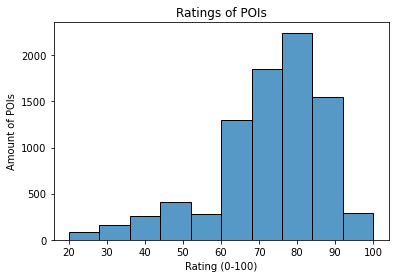

In [114]:
# Looking at Ratings
sns.histplot(final_df['rating'], bins = 10)
plt.xlabel('Rating (0-100)')
plt.ylabel('Amount of POIs')
plt.title('Ratings of POIs')
plt.show()

In [ ]:
# definitely a right skew, with most ratings falling between 60 and 90

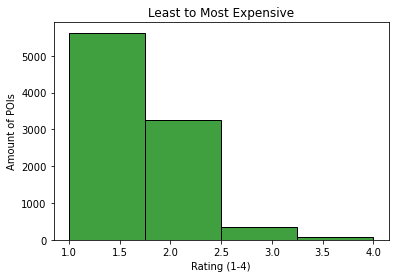

In [115]:
# Looking at prices
sns.histplot(final_df['price'], bins = 4, color = 'green')
plt.xlabel('Rating (1-4)')
plt.ylabel('Amount of POIs')
plt.title('Least to Most Expensive')
plt.show()

In [ ]:
# just wanting the below graph to look nice


In [282]:
# looking at price vs ratings
price_rating_fig = px.histogram(
    final_df,
    x='price', 
    y='rating', 
    histfunc='avg',
    nbins=8,
    color_discrete_sequence=['#79e5cb'],
    labels=dict(price="price from least to most expensive", 
                rating="rating out of 100"))
price_rating_fig.update(layout_yaxis_range = [50,100])
price_rating_fig.update_layout(
    title={
        'text': 'Price vs AVG Rating',
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
price_rating_fig.update_layout({'plot_bgcolor': '#dfe7ed',},bargap=0.1)
price_rating_fig.show()

In [301]:
# looking at price vs ratings
price_count_fig = px.histogram(
    final_df,
    x='price', 
    histfunc='count',
    nbins=8,
    color_discrete_sequence=['#2d8c9e'],
    labels=dict(price="price from least to most expensive"))
price_count_fig.update(layout_yaxis_range = [0,6000])
price_count_fig.update_layout(
    title={
        'text': '# of POIs per Price Point',
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
price_count_fig.update_layout({'plot_bgcolor': '#dfe7ed',},bargap=0.1)
price_count_fig.show()

In [305]:
# looking at price vs number of bikes
fig = px.histogram(
    final_df,
    y='price', 
    x='totalBikes', 
    histfunc='avg',
    nbins= 26,
    color_discrete_sequence=['#F7CAC9'],
    labels=dict(price="price from least to most expensive", 
                bikes="total # of bikes"))
fig.update(layout_xaxis_range = [0,50])
fig.update(layout_yaxis_range = [0,3])
fig.update_layout(
    title={
        'text': 'Price vs # of Bikes',
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
fig.update_layout({'plot_bgcolor': '#dfe7ed',})
fig.show()

In [219]:
# making a matrix of all data
fig = px.scatter_matrix(final_df,
                        dimensions=['price', 'rating', 'totalBikes'],
                        color="poiCat",
                       color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(
    title={
        'text': 'All of my Data is Discrete but Colours are Beautiful',
        'y':.95,
        'x': .5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
fig.show()

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [302]:
price_rating_count_fig.show()
price_rating_fig.show()

Originally, since the data showed so many establishments with cheaper price points, I assumed that they would be rated higher on average, just due to sheer numbers. (See `# of POIs per Price Point`).

After examining the data closer, however, I saw that while there *was* a correlation between ratings and prices, but it swung the other direction. Despite having a numbers advantage, the lower priced establishments still tended to rate poorly in comparison to their more expensive counterpoints.

(And on a sidenote, the data shows a small correlation between total bikes and both rating and price. Insinuating that "nicer" establishments, are more likely to have a higher number of bikes per nearby bikeshare)

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [330]:
# sqlite imports
import sqlite3 as sqlite
from sqlalchemy import create_engine
from sqlite3 import Error

In [310]:
# connecting to sqlite and creating database
connect = sqlite.connect("../data/bikesVsYelpVsFSQ.sqlite")

In [314]:
# exporting dataframe to database
final_df.to_sql("final_df",connect, if_exists="replace")

16131

In [ ]:
connect.close()

In [337]:
# function to return whether or not the connection was successful
def create_connection(path):
    con = None
    try:
        con = sqlite.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"the error '{e}' pccirred")
    return con

In [342]:
con = create_connection('../data/bikesVsYelpVsFSQ.sqlite')

Connection to SQLite DB successful


Look at the data before and after the join to validate your data.

In [311]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16131 entries, 0 to 18519
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        16131 non-null  object 
 1   popularity  9113 non-null   float64
 2   price       9325 non-null   float64
 3   rating      8401 non-null   float64
 4   distance    16131 non-null  float64
 5   latitude    16131 non-null  float64
 6   longitude   16131 non-null  float64
 7   stationId   16131 non-null  object 
 8   totalBikes  16131 non-null  int64  
 9   poiCat      16131 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 1.4+ MB


In [312]:
final_df.shape[0]

16131

In [339]:
sql = 'SELECT * FROM final_df'
df = pd.read_sql_query(sql, con)
df

,index,name,popularity,price,rating,distance,latitude,longitude,stationId,totalBikes,poiCat
0,0,Inn,9.67,2.0,NaN,36.000000,41.765862,-87.614787,0503ab6ec0734343264ef6f2e972c32b,2,restaurant
1,1,Roy's Soul Food,8.93,1.0,NaN,45.000000,41.765862,-87.614787,0503ab6ec0734343264ef6f2e972c32b,2,restaurant
2,2,Sammy Submarine,NaN,NaN,NaN,69.000000,41.765862,-87.614787,0503ab6ec0734343264ef6f2e972c32b,2,restaurant
3,3,Sunny Submarine,9.97,1.0,NaN,70.000000,41.765862,-87.614787,0503ab6ec0734343264ef6f2e972c32b,2,restaurant
4,4,Gold Post Lounge,NaN,NaN,NaN,180.000000,41.765862,-87.614787,0503ab6ec0734343264ef6f2e972c32b,2,restaurant
...,...,...,...,...,...,...,...,...,...,...,...
16126,18514,Pauline Books and Media Chicago,NaN,2.0,100.0,494.343620,41.889375,-87.627077,766f998ceaa433774940a1cb0674445f,30,books
16127,18515,Barbara's Bestsellers,NaN,2.0,70.0,707.843830,41.889375,-87.627077,766f998ceaa433774940a1cb0674445f,30,books
16128,18516,Kurt Gippert Bookseller ABAA,NaN,2.0,100.0,709.178438,41.939398,-87.711561,8331b895b5ffe28350476baa3eb663c0,12,books
16129,18518,Curbside Books & Records,NaN,2.0,60.0,1278.560000,41.871467,-87.640949,ee6928bd2a7172a0189305ebc12505c3,14,books


In [340]:
df.shape[0]

16131

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16131 entries, 0 to 16130
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       16131 non-null  int64  
 1   name        16131 non-null  object 
 2   popularity  9113 non-null   float64
 3   price       9325 non-null   float64
 4   rating      8401 non-null   float64
 5   distance    16131 non-null  float64
 6   latitude    16131 non-null  float64
 7   longitude   16131 non-null  float64
 8   stationId   16131 non-null  object 
 9   totalBikes  16131 non-null  int64  
 10  poiCat      16131 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.4+ MB


In [ ]:
# join appears to have been successful!